In [1]:
import tensorflow as tf

In [10]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [17]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


Plot an Image and the matching value

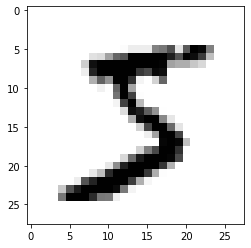

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap='binary')
plt.show()

In [18]:
y_train[7]

3

One Hot Encoding of the outputs

In [19]:
from tensorflow.keras.utils import to_categorical

y_train_enc=to_categorical(y_train)
y_test_enc=to_categorical(y_test)

In [20]:
y_train_enc[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Unrolling N-dimensional Arrays [28 by 28] to Vectors [784 by 1]

In [25]:
import numpy as np

x_train_vec = np.reshape(x_train, (60000,784))
x_test_vec = np.reshape(x_test, (10000, 784))

print('y_train_vec shape', x_train_vec.shape)
print('x_test_vec shape', x_test_vec.shape)

y_train_vec shape (60000, 784)
x_test_vec shape (10000, 784)


Data Normalization

In [27]:
x_mean=np.mean(x_train_vec)
x_std=np.std(x_train_vec)
epsilon=1e-10
x_train_norm=(x_train_vec-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_vec-x_mean)/(x_std+epsilon)

Creating Model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation ='relu', input_shape=(784,)),
    Dense(120, activation='relu'),
    Dense(10, activation='softmax')
])



In [46]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1210      
Total params: 117,170
Trainable params: 117,170
Non-trainable params: 0
_________________________________________________________________


Training the Model

In [47]:
model.fit(x_train_norm, y_train_enc, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3813 - accuracy: 0.8872: 0s - los
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1893 - accuracy: 0.9442
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1439 - accuracy: 0.9581


In [48]:
_,accuracy=model.evaluate(x_test_norm, y_test_enc)
print('Test accuracy', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1379 - accuracy: 0.9561
Test accuracy 0.9560999870300293


Predictions

In [49]:
preds=model.predict(x_test_norm)

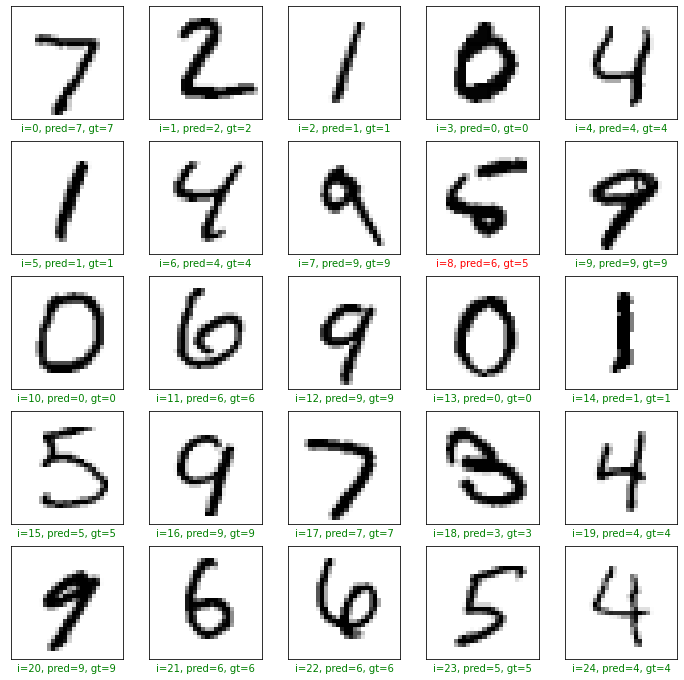

In [51]:
plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred !=gt:
        col='r'
        
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='binary')
plt.show()

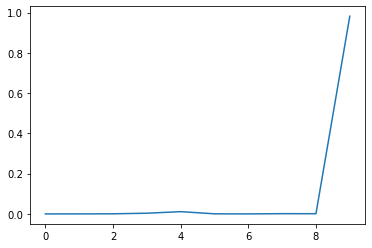

In [53]:
plt.plot(preds[7])
plt.show()